I got rid of all data points which might have been put in manually from paper records.  
Regex: ([0-9]{2}-[0-9]{2}-[0-9]{4})\t(08:00|12:00|18:00|22:00)\t([0-9]{2})\t([0-9]{3})\n

![wq0fpUp[1].png](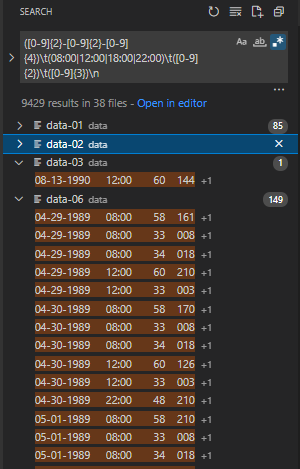)

I was considering getting rid of all unspecified special event activities as well but did not (yet).
To avoid Curse of Dimensionality, I refrained from using KNN and opted to use SVM.

While reading I discovered that some rows were invalid, including glucose levels of 0, below 10, some not even numeric etc...

![WcEGigs[1].png](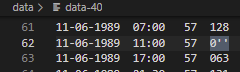)

![hySPjxn[1].png](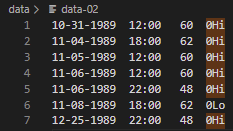)

I filtered these out when reading with the following regex:
([0-9]{2}-[0-9]{2}-[0-9]{4})\t([0-9]{1,2}:[0-9]{2})\t([0-9]{2})\t([0-9]{3})\n

I later found that some values where not in the typical possibile ranges that glucose levels can be in, so I filtered out anything below double digit numbers.

I ommit the date as the it is specified that the value is to be predicted based on time and activity.

In [22]:
import os
import re
from datetime import datetime

pattern = re.compile("([0-9]{2}-[0-9]{2}-[0-9]{4})\t([0-9]{1,2}:[0-9]{2})\t([0-9]{2})\t([0-9]{2,3})\n")

x = []
y = []

files = os.listdir('data')
for f in files:
  with open('data/'+f) as file:
    for line in file:
      try:
        if not pattern.match(line):
          continue
        (date, time, task, value) = line.split('\t')
        h, m = time.split(":")
        t = int(h)*3600+int(m)*60
        # dtstr = date+" "+time+":00"
        # dt = datetime.strptime(dtstr, '%m-%d-%Y %H:%M:%S')
        # newx = [dt.timestamp(), int(task)]
        newx = [t, int(task)]
        newy = float(value.replace('\n', ''))
        # if newy < 10:
        #   continue
        x.append(newx)
        y.append(newy)
      except:
        print(f"Bad data: {line}")


In [19]:
# split into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

0.1276128762541806

In [ ]:
# svm
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.score(x_test, y_test)

In [8]:
# from datetime import datetime
# dt = datetime.strptime("08-13-1990 11:56:00", '%m-%d-%Y %H:%M:%S')
t = 12*3600+34*60
print(clf.predict([
                   [t, 33]
                   ]))

[4.]
